# EE769: Assignment 1
#Roll Number: 213074005

Importing all the necessary libraries

In [513]:
import numpy as np #numpy library for array/matrix operations
from matplotlib import pyplot as plt  #for plotting



**Q1. Write a function to generate a data matrix X. Inputs: Number of samples, feature dimension. Output: Data matrix X. [1]**

Assumption: We need to initialize a matrix with all 0s or 1s which will be used to load the input data into it

In [514]:
def generateDataMatrix (noOfSamples,featureDims): #function defination
  return np.ones([noOfSamples,featureDims])   #creating an array of all ones with the dimensions as given

generateDataMatrix(10,15) #call the function to test

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

**2. Write a function to generated dependent variable column t. [1]**

we use the formula t=y(w,x) + epsilon

where epsilon is gaussian distributed RV with variance passed as argument

In [515]:
def generate_t(X,w,w0,noise_var):
  #augment 1s in the X matrix
  
  onesCol=np.ones([len(X)]) #create the column of ones whic will be appended to X
  X=np.column_stack((X, onesCol)) #append the column of 1s to X  #reference: https://stackoverflow.com/questions/24923046/augmenting-a-matrix-in-python-using-numpy
  # print(X.shape)


  #append w0 to the w array
  w=np.append(w,w0)   #reference:https://numpy.org/doc/stable/reference/generated/numpy.append.html
  # print(w.shape)
  t=np.matmul(X,w) + np.random.normal(0, noise_var, len(X)) # generate t as described above, the mean for gaussian noise is 0

  return t




Lets test the function

In [516]:
X_data =np.random.randint(10,size=(100,25)) #data with 100 inputs and 25 features
w_data =np.random.randint(10,size=(25)) #25 weights
w0_data=np.random.randint(10) #generate bias randomly
noise_var_data= 0.01*np.random.randint(100) #generate bias randomly between 0 and 1

generate_t(X_data,w_data,w0_data,noise_var_data)



array([530.63214888, 652.31105895, 705.51500447, 633.03412835,
       477.02742027, 603.46784901, 572.10507627, 582.58111651,
       545.8873038 , 520.17155405, 440.73645218, 331.53422498,
       640.48997324, 528.69744919, 638.53502696, 626.75581105,
       624.23171559, 577.54271754, 486.6057711 , 529.77226311,
       582.76059698, 382.16688799, 393.552873  , 512.61289585,
       317.64401732, 631.72225532, 462.00185317, 603.36592448,
       440.5307467 , 500.5336032 , 581.07029439, 533.79177424,
       567.36665048, 490.42017715, 578.86317096, 534.32218605,
       615.4920506 , 545.05792557, 498.79700352, 451.3214854 ,
       644.08673144, 596.22332636, 517.21439037, 529.91732662,
       583.92863946, 594.15514993, 562.9553053 , 342.83298089,
       561.18428008, 504.93850067, 506.12396406, 620.42163425,
       503.26745994, 401.88509831, 447.30807143, 425.15979066,
       672.96903442, 582.18920436, 417.00901974, 496.7991525 ,
       500.06391102, 486.99109541, 455.18946102, 553.68

 **3. Write a function to compute a linear regression estimate. [1]
a) Input: data matrix X and weight vector w
b) Output: y**

in this function we need to do the matrix multiplication of matrix x and w to opbatin matrix y.
If matrix X has dimensions m *n , then matrix W must have dimension n * 1 so that output has dimensions n * 1

for bias term w0, we will augment column of all 1s in the input matrix X

In [517]:
def LinearReg(X,W):
  #augment 1s in the X matrix
  
  onesCol=np.ones([len(X)]) #create the column of ones whic will be appended to X
  X=np.column_stack((X, onesCol)) #append the column of 1s to X  #reference: https://stackoverflow.com/questions/24923046/augmenting-a-matrix-in-python-using-numpy
  # print(np.shape(X))
  # print(np.shape(W))
  return np.matmul(X,W) #multiply X with W and return the product


Lets test the above function

In [518]:
#lets generate random dataset with 5 features and 20 input datasets
num_of_data=30
num_of_features=5
#generate X with random integers with the size as that of the input matrix (inputs * features) # Ref:https://numpy.org/doc/stable/reference/random/generated/numpy.random.randint.html
X=np.random.randint(10,size=(25,5))
#generate W with random integers with size features+1 (bias term)
W=np.random.randint(10,size=(5+1))

#call the function 

y=LinearReg(X,W)
y


array([76., 58., 37., 56., 49., 46., 70., 51., 57., 44., 31., 55., 72.,
       48., 83., 20., 69., 45., 53., 71., 43., 19., 69., 77., 50.])

**4. Write a function to compute the mean square error of two vectors y and t. [1]**

Mean square error is sum of squares difference of each y and t, and divided by length of y / t


In [519]:
def calc_MSE(y,t):
  data_len = y.shape[0] # to get the length of y (and t) array (which is single dimension)

  MSE = (1/data_len)*np.sum(np.square(y-t)) # np.square to square the difference (vectore operation) and np.sum will sum all the elements of the array 
  return MSE #return the calculated MSE



Lets check the function with random data

In [520]:
#generate random int (upto 10) arrays of length 30
y_data =np.random.randint(10,size=(30))
t_data =np.random.randint(10,size=(30))

MSE_fun = calc_MSE(y_data,t_data) #call the function and pass the arguments
MSE_fun #display the value

11.9

**5.Write a function to estimate the weights of linear regression using pseudo-inverse, assuming L2 regularization [2]:
a) Input: X, t, and lambda
b) Output: w, MSE, y**

This is to be calculated using this formula 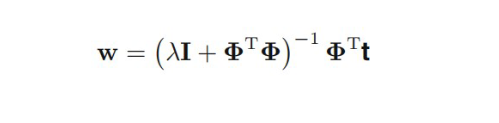

In addition to the inputs as given in the question, we may also have to pass in the 'bias' term which will be appended to the weight vector W to calculate linear regression function 

In [521]:
def pseudo_inv_L2 (X,t,lamda):
  I = np.identity(X.shape[1]+1) # create identity matrix of size of *feature_size* PLUS 1 since we are appending column of ones. reference:https://www.geeksforgeeks.org/numpy-identity-python/
  onesCol=np.ones([len(X)]) #create the column of ones which will be appended to X
  X_1=np.column_stack((X, onesCol)) #append the column of 1s to X  #reference: https://stackoverflow.com/questions/24923046/augmenting-a-matrix-in-python-using-numpy

  a= (lamda*I) + np.matmul((np.transpose(X_1)),X_1) #intermididiate variable for the expression inside bracket as above formula
  b= np.linalg.inv(a) # inverse, intermidiet variable reference: https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html
  c=np.matmul(b , (np.transpose(X_1)))
  w =  np.matmul(c, t) #calculate w as per formula
  # w=np.append(w,bias) #append the bias term to the obtained Weight matrix/array
  y= LinearReg(X,w)
  mse= calc_MSE(y,t)
  return w ,y, mse



Check the function with random data

In [522]:
X_data =np.random.randint(10,size=(100,25)) #data with 100 inputs and 25 features
t_data =np.random.randint(10,size=(100)) #random t matrix
lamda_data = 0.1
bias_data = 0

w_fun = pseudo_inv_L2 (X_data,t_data,lamda_data)
w_fun

(array([ 5.28818299e-02,  5.09950149e-03, -3.67488777e-02, -9.76229905e-02,
         1.22977065e-01, -6.67646371e-02,  1.87135613e-03,  4.99114334e-02,
         2.37307564e-02, -2.00952320e-01, -1.12166015e-01,  2.70377186e-02,
        -6.55642921e-03, -6.59891203e-02,  5.85777546e-02, -9.52795527e-03,
         9.30007327e-02,  7.24184894e-02, -1.67575574e-01, -1.69680537e-01,
         1.24554983e-01,  1.58879734e-01, -2.39784127e-02,  6.56837248e-02,
         1.64944803e-01,  4.16971301e+00]),
 array([4.23131893, 4.28570182, 2.77857711, 2.06575063, 5.99903845,
        6.75830071, 4.60396874, 6.61264449, 4.69463245, 5.54828221,
        3.03769836, 4.47250739, 4.10294876, 4.8273969 , 3.79491002,
        3.00087611, 4.5445794 , 4.68296734, 5.08011809, 3.83152299,
        3.71267108, 5.63310644, 4.37725515, 5.19493853, 3.44242712,
        4.63907915, 3.43378203, 3.81654691, 3.89842765, 5.32328011,
        4.47383441, 3.52804255, 4.76337234, 5.10991705, 4.5739183 ,
        4.25268679, 3.73

**6. Write a function to compute the gradient of MSE with respect to its weight vector. [2]
a) Input: X matrix, t vector, and w vector
b) Output: gradient vector**

The gradient will be given by (1/n){2*(t- W*X) *-X}








In [523]:
def grad_MSE(X,t,w):
  b=LinearReg(X,w) # linear regression to compute output
  onesCol=np.ones([len(X)]) #create the column of ones whic will be appended to X
  X_1=np.column_stack((X, onesCol)) #append the column of 1s to X  #reference: https://stackoverflow.com/questions/24923046/augmenting-a-matrix-in-python-using-numpy

  a= 2*(t-b) # intermidiate term as per above formula
  grad=(1/t.shape[0])*np.matmul(a,X_1) #multiplying intermidiet terms and dividing by number of samples to get final output
  return grad

Test with random data

In [524]:
X_data =np.random.randint(10,size=(100,25)) #data with 100 inputs and 25 features
t_data =np.random.randint(10,size=(100)) #random t array
W_data =np.random.randint(10,size=(25+1)) #random w array, 25 elements plus 1 bias term

grad_data= grad_MSE(X_data,t_data,W_data)
grad_data

array([-4527.86, -4034.28, -4389.14, -3816.24, -4256.76, -4434.78,
       -4170.7 , -4755.46, -3997.2 , -4255.54, -4088.94, -4464.54,
       -4477.5 , -4608.12, -4313.96, -3929.54, -4622.44, -4256.48,
       -4291.66, -4486.06, -4410.42, -4626.64, -4189.48, -4365.5 ,
       -4272.92,  -947.34])

**7. Write a function to compute L2 norm of a vector w passed as a numpy array. Exclude bias w0. [1]**

L2 Norm is **SQUAREROOT** of sum of squares of weight vectors

In [525]:
def Calc_L2_norm(w):
  w[(w.shape[0])-1]=0 #the last term of the w array is bias term, making it zero so that it doesnt contribute into the L2 norm
  L2_norm= np.sqrt(np.sum(np.square(w))) #root of sum of squares of elements of w
  return L2_norm

Test with test data, we will use the same W_data matrix as used in above question

In [526]:
L2_norm_fun=Calc_L2_norm(W_data)
L2_norm_fun

25.219040425836983

**8. Write a function to compute the gradient of L2 norm with respect to the weight vectors. [2]
a) Input: X matrix and w vector
b) Output: gradient vector, where gradient with respect to w0 is 0.**

Gradient of L2 norm will be given by W/2*sqrt((sum(W^2))) 

Also X is not needed here

In [527]:
def Calc_grad_L2_norm(w):
 
  w[(w.shape[0])-1]=0 #the last term of the w array is bias term, making it zero so that it doesnt contribute into the L2 norm

  grad_L2_norm= w/(2*(np.sqrt(np.sum(np.square(w))))) #as per formula stated above
  return grad_L2_norm


Test the function

In [528]:
W_data =np.random.randint(10,size=(25+1)) #random w array, 25 elements plus 1 bias term
grad_L2_norm_fun=Calc_grad_L2_norm(W_data)
grad_L2_norm_fun

array([0.01819686, 0.12737804, 0.10918118, 0.12737804, 0.03639373,
       0.        , 0.14557491, 0.01819686, 0.03639373, 0.        ,
       0.        , 0.07278745, 0.14557491, 0.14557491, 0.09098432,
       0.12737804, 0.12737804, 0.12737804, 0.07278745, 0.12737804,
       0.14557491, 0.10918118, 0.01819686, 0.14557491, 0.01819686,
       0.        ])

**9. Write a function to compute L1 norm of a vector w passed as a numpy array. Exclude bias w0. [1]**

L1 Norm is  sum of the  absolute values of all weights

In [529]:
def Calc_L1_norm(w):
  w[(w.shape[0])-1]=0 #the last term of the w array is bias term, making it zero so that it doesnt contribute into the L1 norm
  L1_norm= np.sum(abs(w))
  return L1_norm


Try the function with random matrix

In [530]:
W_data =np.random.randint(10,size=(25+1)) #random w array, 25 elements plus 1 bias term
L1_norm_fun=Calc_L1_norm(W_data)
L1_norm_fun

105

**10. Write a function to compute the gradient of L1 norm with respect to the weight vectors. [2]
a) Input: X matrix and w vector
b) Output: gradient vector, where gradient with respect to w0 is 0.**

L1 gradient is nothing but the gradient of |w|


|w| is    +w  ......for w>0

          -w  ......for w<0

thus the gradient is 

+1 if w is positive and
-1 if w is negative

we use numpy sign function (reference :https://numpy.org/doc/stable/reference/generated/numpy.sign.html)

In [531]:
def Calc_grad_L1_norm(w):
 
  w[(w.shape[0])-1]=0 #the last term of the w array is bias term, making it zero so that it doesnt contribute into the L1 norm
  
  grad_L1_norm= np.sign(w)
  return grad_L1_norm

Test the function with random weight matrix

In [532]:
W_data =np.random.randint(low=-10,high=10,size=(25+1)) #random w array, 25 elements plus 1 bias term in the range -10 to +10 #reference:https://www.geeksforgeeks.org/random-sampling-in-numpy-randint-function/
grad_L1_norm_fun=Calc_grad_L1_norm(W_data)
grad_L1_norm_fun

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1,  1,
        1,  1,  0,  1,  1,  1, -1, -1,  0])

**11. Write a function for a single update of weights of linear regression using gradient descent. [2]
a) Input: X, t, w, eta, lambda 2, lambda 1. Note that the weight of MSE will be 1
b) Output: updated weight and updated MSE**

The updated weights are given by

W(updated) = W(initial) - eta* grad(MSE*)

where MSE* = MSE+ L1 Regularization + L2 Regularization

grad(MSE*) will be 

= grad(MSE) + grad(L1_norm) + grad(L2_norm)


In [533]:
def single_update(X,t,w,eta,lamda2,lamda1):
  w_updated= w - eta*(grad_MSE(X,t,w)+lamda2*Calc_grad_L2_norm(w)+lamda1*Calc_grad_L1_norm(w)) #calculate the updated w as stated above (sum of all gradients)
  y_updated=LinearReg(X,w_updated) #using updated weights, calculated updated y
  mse_updated=calc_MSE(y_updated,t) #using new y, calculate new MSE
  return w_updated,mse_updated

Generate random values to test this function

In [534]:
X_data =np.random.randint(low=-10,high=10,size=(100,25)) #data with 100 inputs and 25 features
t_data =np.random.randint(low=-10,high=10,size=(100)) #random t array
W_data =np.random.randint(low=-10,high=10,size=(25+1)) #random w array, 25 elements plus 1 bias term
#arbitarily selecting hyperparameters
eta_data = 0.01
lamda2_data=0.05
lamda1_data = 0.02

single_update(X_data,t_data,W_data,eta_data,lamda2_data,lamda1_data)

(array([-12.79794622,  14.57674622,  14.88393854, -10.31194622,
        -11.79614622,  10.45855391, -15.70773854,  -5.51079232,
        -15.47693086, -17.06133086,  -0.9504    ,  -5.67156159,
         -9.40776159,  -8.33295391,  -2.75378464,   7.27996927,
         -5.98136927,  14.00073854,  10.44653086,  -4.30461536,
        -22.52972318,  12.31453854, -18.90953086,  -0.54298464,
          4.94196927,   0.9258    ]), 162306.59514887966)

**12. Write a function to estimate the weights of linear regression using gradient descent. [3]
a) Inputs: X, t, lambda2 (default 0), lambda1 (default 0), eta, max_iter, min_change_NRMSE
b) Output: Final w, final RMSE normalized with respect to variance of t.
c) Stopping criteria: Either max_iter has been reached, or the normalized RMSE does not change by more than
min_change_NRMSE**

The function will be similar to the above one, except now it will run iteratively, till either max number of iterations are reached or the error doesnt change much

In [535]:
def grad_des(X,t,w,eta,max_iter,min_change_NRMSE,lamda2=0,lamda1=0):

   iter=0
  #  delta_nrmse=1000
   nrmse_prev=0

  #  while(not(abs(delta_nrmse)<min_change_NRMSE) or not(iter>max_iter)):
   for iter in  range(max_iter):
    # (w_updated,mse_updated)=single_update(X,t,w,eta,lamda2,lamda1)
    w_updated= w + (eta*grad_MSE(X,t,w))+((lamda2*Calc_grad_L2_norm(w))+(lamda1*Calc_grad_L1_norm(w))) #calculate the updated w as stated above (sum of all gradients)
    y_updated=LinearReg(X,w_updated) #using updated weights, calculated updated y
    mse_updated=calc_MSE(y_updated,t) #using new y, calculate new MSE
    nrmse=np.sqrt(mse_updated)/np.std(t)  #calculate nrsme by taking sqrt of mse and dividing my variance of t
    delta_nrmse= nrmse_prev-nrmse #calculate the difference delta between nrmse values of current and prev rmse
    nrmse_prev=nrmse #update prev rmse value
    iter=iter+1 #increase iteration counter
    w=w_updated #update w vector
    # print(nrmse)
    # print(w_updated)
    #if delta becomes less than min change required, then loop is broken
    if(abs(delta_nrmse)<min_change_NRMSE):
      break;
   print("\n stopped after "+ str(iter)+"th iteration")
   return w_updated,y_updated,nrmse
   

Test the code with random data

In [536]:
X_data =0.1*np.random.randint(low=-10,high=10,size=(500,25)) #data with 100 inputs and 25 features
t_data =0.1*np.random.randint(low=-10,high=10,size=(500)) #random t array
# W_data =0.1*np.random.randint(low=-10,high=10,size=(25+1)) #random w array, 25 elements plus 1 bias term
W_data=np.random.normal(0, 1, (25+1))
#arbitarily selecting hyperparameters
eta_data = 0.01
lamda2_data=0
lamda1_data = 0
max_iter_data=1000
min_change_NRMSE_data=0.001

grad_des(X_data,t_data,W_data,eta_data,max_iter_data,min_change_NRMSE_data,lamda2=0,lamda1=0)


 stopped after 388th iteration


(array([-0.09509059, -0.05198041,  0.14019925, -0.09683141,  0.04675226,
        -0.09057295,  0.10179456,  0.0911645 , -0.05682288, -0.06991176,
        -0.1124027 ,  0.13768268,  0.0577694 , -0.12728229, -0.04542163,
        -0.07185084, -0.11311272,  0.13269806,  0.05704002,  0.04269799,
         0.01348951,  0.0634092 ,  0.08669071,  0.06446234,  0.21536481,
        -0.05590602]),
 array([-2.53569583e-01, -1.74145571e-01, -4.78317787e-02,  2.15408569e-01,
         3.88652563e-01, -1.38362683e-01,  4.11026553e-02, -2.52648379e-01,
        -3.91693701e-01, -5.12615660e-02, -2.23685607e-01,  2.51317305e-02,
         1.28786689e-01, -8.34687082e-02,  4.94524456e-01, -3.03647526e-01,
        -3.12806196e-01, -3.25606843e-03,  3.84717045e-01,  4.16828090e-03,
         3.18437571e-02, -1.40133655e-01,  2.16109130e-01, -1.50416801e-01,
        -5.76622880e-02,  2.98611589e-02,  3.11797400e-01,  1.79326524e-01,
         9.70201887e-02,  3.07841189e-01, -4.64812850e-01, -3.58854620e-01,
    

**13. Run multiple experiments (with different random seeds) for, plot the results of (box plots), and comment on the trends and
potential reasons for the following relations:**

**a.Training and validation NRMSE obtained using pseudo inverse with number of training samples [2]**

We will consider 5 different length datasets: 
100,200,300,400,500

for each of these, we will keep training to validation data ratio as 80:20


Lets work with 25 features

In [537]:
no_of_features=25
dataset_length=np.array([100,200,300,400,500,600,700,800,900,1000])


X_dataset_list=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list=[] #will contain training dataset for input
X_dataset_val_list=[] #this will conrain validation dataset for input

t_dataset_train_list=[] #will contain training dataset for t
t_dataset_val_list=[] #this will conrain validation dataset for t

original_weights_a=np.random.randint(low=-10,high=10,size=no_of_features) #true weights, which will be used to generate t


#lets first generate datasets
for i in range(len(dataset_length)):
  np.random.seed(i+20) #set random seed
  X_data=np.random.randint(low=-10,high=10,size=(dataset_length[i],no_of_features))#random X array of shape: ip size x features
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length[i])) #random t array of shape: features
  w0_data=0.1*np.random.randint(low=-10,high=10) #generate w0 randomly between -10 and 10
  noise_var=0.1*np.random.randint(low=-200,high=200) #generate noise variance randomly between -2 and 2

  t_data=generate_t(X_data,original_weights_a,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list.append(X_data)
  t_dataset_list.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(dataset_length)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length[i])
  b=int(0.80*dataset_length[i])
  c=int(dataset_length[i])


  # curr_dataset=X_dataset_list[i]

  # X_data_train=curr_dataset[:a,:]
  # X_data_val=curr_dataset[b:c,:]



  X_data_train=X_dataset_list[i][:a,:]
  X_data_val=  X_dataset_list[i][b:c,:]

  X_dataset_train_list.append(X_data_train)
  X_dataset_val_list.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(dataset_length)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length[i])
  b=int(0.80*dataset_length[i]+1)
  c=int(dataset_length[i])


  # curr_dataset=X_dataset_list[i]

  # X_data_train=curr_dataset[:a,:]
  # X_data_val=curr_dataset[b:c,:]



  
  #slice the array in such a way such that dataset is split into 80:20 

  t_data_train=t_dataset_list[i][0:int(0.8*dataset_length[i])]
  t_data_val=  t_dataset_list[i][int(0.8*dataset_length[i]):dataset_length[i]]

  #append to the list

  t_dataset_train_list.append(t_data_train)
  t_dataset_val_list.append(t_data_val)

















Now that we have training and validation datasets of different sizes ready with us, lets do the training (obtain w) using pseudo inverse method



In [538]:
weight_list=[]   #list to store w matrix for various datasets
NRMSE_train_list=[] #list to store nrmse  for various datasets
output_train_list=[] #list to store outputs  for various datasets

NRMSE_val_list=[] #list to store validation nrmse  for various datasets
output_val_list=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

for i in range (len(dataset_length)):

  
  weights,output_train,mse_train=pseudo_inv_L2 (X_dataset_train_list[i],t_dataset_train_list[i],lamda_value)

  #calculate nrmse from mse
  nrmse_train= np.sqrt(mse_train)/np.std(t_dataset_train_list[i])

  #append to the list respective return values

  weight_list.append(weights)
  NRMSE_train_list.append(nrmse_train)

  output_train_list.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(dataset_length)):
  #first make the predictions using weights obtained on train data
  output_val=LinearReg(X_dataset_val_list[i],weight_list[i])
  

  mse_val=calc_MSE(output_val,t_dataset_val_list[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_dataset_val_list[i])

  NRMSE_val_list.append(nrmse_val)

  
  

  





In [539]:
NRMSE_train_list,NRMSE_val_list

([0.0014879712624192862,
  0.002136567613640269,
  0.0017798355413025304,
  0.002161241769592224,
  0.002082224463579494,
  0.0020035334833699665,
  0.002017481022305006,
  0.002196057505884388,
  0.00203904472702605,
  0.002159621579123002],
 [0.0036085415901118455,
  0.0017423184887986223,
  0.002282728380650077,
  0.002048246696756584,
  0.002209215281564919,
  0.0021792582041542784,
  0.0021516815127104834,
  0.0023334780809564615,
  0.0022407503070245305,
  0.00208754573284833])

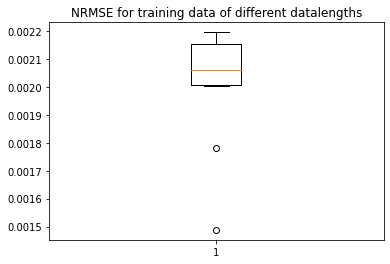

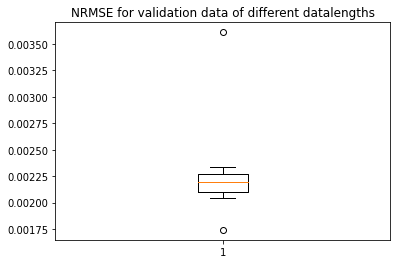

In [540]:
plt.boxplot([NRMSE_train_list])
plt.title("NRMSE for training data of different datalengths")
plt.show()

plt.boxplot([NRMSE_val_list])
plt.title("NRMSE for validation data of different datalengths")
plt.show()







# fig = plt.figure(figsize =(10, 7))
 
# # Creating axes instance
# ax = fig.add_axes(["Training Data","Validation Data"])
 
# # Creating plot
# bp = ax.boxplot([NRMSE_train_list,NRMSE_val_list])
 
# # show plot
# plt.show()

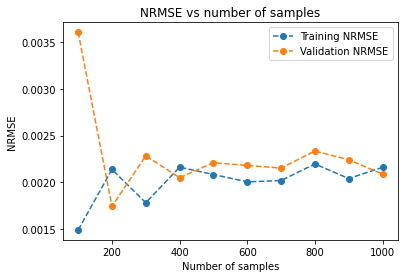

In [541]:
plt.figure()
plt.plot(dataset_length,NRMSE_train_list,label='training data',linestyle='--', marker='o')
plt.plot(dataset_length,NRMSE_val_list,label='validation  data',linestyle='--', marker='o')
plt.title("NRMSE vs number of samples")
plt.xlabel("Number of samples")
plt.ylabel("NRMSE")
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/


We can see the that the Training NRMSE decreases as number of samples increase this might be because with increased number of samples, there might be more order or pattern in the dataset, due to which the the eventual error decreases 

For validation data, the error slightly increases with increases because even the number of validation samples increase which might lead to increase in variance

**b) Training and validation NRMSE obtained using pseudo inverse with number of variables [2]**

We keep the dataset length fixed to 5000 and vary the number of variables as {10,20,30,40,50,60,70,80,90,100}

In [542]:
no_of_variables=[10,20,30,40,50,60,70,80,90,100] #list of variables/features for various dataset lengths
dataset_length_b=5000 # number of inputs

X_dataset_list_b=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_b=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_b=[] #will contain training dataset for input
X_dataset_val_list_b=[] #this will conrain validation dataset for input

t_dataset_train_list_b=[] #will contain training dataset for t
t_dataset_val_list_b=[] #this will conrain validation dataset for t



#lets first generate datasets
for i in range(len(no_of_variables)):
  original_weights_b=np.random.randint(low=-10,high=10,size=no_of_variables[i]) #true weights, which will be used to generate t

  np.random.seed(i+15)    #set random seed

  X_data=np.random.randint(low=-10,high=10,size=(dataset_length_b,no_of_variables[i]))#random X array of shape: ip size x features
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length_b)) #random t array of shape: features
  

  w0_data=0.1*np.random.randint(low=-10,high=10) #generate w0 randomly between -10 and 10
  noise_var=0.1*np.random.randint(low=-200,high=200) #generate noise variance randomly between -2 and 2

  t_data=generate_t(X_data,original_weights_b,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_b.append(X_data)
  t_dataset_list_b.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(no_of_variables)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_b)
  b=int(0.80*dataset_length_b)
  c=int(dataset_length_b)




  #array slicing
  X_data_train=X_dataset_list_b[i][:a,:]
  X_data_val=  X_dataset_list_b[i][b:c,:]
  #append to list
  X_dataset_train_list_b.append(X_data_train)
  X_dataset_val_list_b.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(no_of_variables)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_b[i][0:int(0.8*dataset_length_b)]
  t_data_val=  t_dataset_list_b[i][int(0.8*dataset_length_b):dataset_length_b]

  #append to the list

  t_dataset_train_list_b.append(t_data_train)
  t_dataset_val_list_b.append(t_data_val)




In [543]:
X_dataset_val_list_b[3].shape, t_dataset_val_list_b[3].shape


((1000, 40), (1000,))

In [544]:
weight_list_b=[]   #list to store w matrix for various datasets
NRMSE_train_list_b=[] #list to store nrmse  for various datasets
output_train_list_b=[] #list to store outputs  for various datasets

NRMSE_val_list_b=[] #list to store validation nrmse  for various datasets
output_val_list_b=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

for i in range (len(no_of_variables)):

  
  weights_b,output_train_b,mse_train_b=pseudo_inv_L2 (X_dataset_train_list_b[i],t_dataset_train_list_b[i],lamda_value)
  

  #calculate nrmse from mse
  nrmse_train= np.sqrt(mse_train_b)/np.std(t_dataset_train_list_b[i])

  #append to the list respective return values

  weight_list_b.append(weights_b)
  NRMSE_train_list_b.append(nrmse_train)

  output_train_list_b.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(dataset_length)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_b[i],weight_list_b[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_b[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_b.append(nrmse_val)


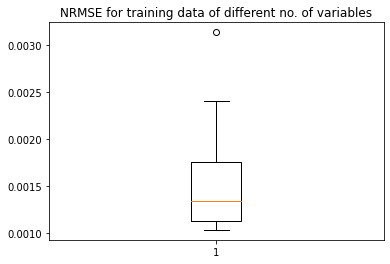

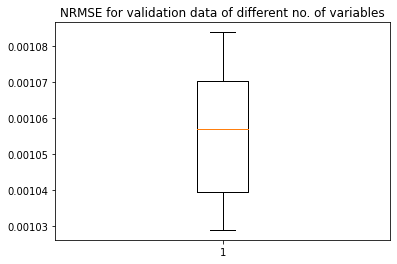

Text(0, 0.5, 'NRMSE')

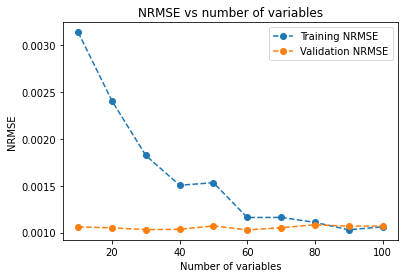

In [545]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_b])  #passing data array to boxplot
plt.title("NRMSE for training data of different no. of variables")
plt.show()

plt.boxplot([NRMSE_val_list_b]) #passing data array to boxplot
plt.title("NRMSE for validation data of different no. of variables")
plt.show()



plt.figure() #
plt.plot(no_of_variables,NRMSE_train_list_b,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of variables
plt.plot(no_of_variables,NRMSE_val_list_b,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against number of variables
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs number of variables")
plt.xlabel("Number of variables")
plt.ylabel("NRMSE")

We can see clear decrease in training NRMSE as number of variables inreases, since more number of variables does make the trends in the data stronger

**d) Training and validation NRMSE obtained using pseudo inverse with w0 [2]**

We will run the training and validation for 10 times for fixed number of variables and inputs (1000 inputs and 50 variables) but w0 will be varied 1 to 10

In [546]:
no_of_variables_c=50  #50 number of variables/features for various dataset lengths
dataset_length_c=1000 # number of inputs
runs_c=10 #create 10 different datasets

w0_list=[1,2,3,4,5,6,7,8,9,10]

X_dataset_list_c=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_c=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_c=[] #will contain training dataset for input
X_dataset_val_list_c=[] #this will conrain validation dataset for input

t_dataset_train_list_c=[] #will contain training dataset for t
t_dataset_val_list_c=[] #this will conrain validation dataset for t

original_weights_c= np.random.randint(low=-10,high=10,size=no_of_variables_c) #true weights, which will be used to generate t

X_data=np.random.randint(low=-10,high=10,size=(dataset_length_c,no_of_variables_c))#random X array of shape: ip size x features
noise_var=0.1*np.random.randint(low=-200,high=200) #generate noise variance randomly between -2 and 2

#lets first generate datasets
for i in range(len(w0_list)):
  
  np.random.seed(i+30)    #set random seed

  
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
  w0_data=w0_list[i]
  

  t_data=generate_t(X_data,original_weights_c,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_c.append(X_data)
  t_dataset_list_c.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(w0_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_c)
  b=int(0.80*dataset_length_c)
  c=int(dataset_length_c)




  #array slicing
  X_data_train=X_dataset_list_c[i][:a,:]
  X_data_val=  X_dataset_list_c[i][b:c,:]
  #append to list
  X_dataset_train_list_c.append(X_data_train)
  X_dataset_val_list_c.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(w0_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_c[i][0:int(0.8*dataset_length_c)]
  t_data_val=  t_dataset_list_c[i][int(0.8*dataset_length_c):dataset_length_c]

  #append to the list

  t_dataset_train_list_c.append(t_data_train)
  t_dataset_val_list_c.append(t_data_val)



In [547]:
weight_list_c=[]   #list to store w matrix for various datasets
NRMSE_train_list_c=[] #list to store nrmse  for various datasets
output_train_list_c=[] #list to store outputs  for various datasets

NRMSE_val_list_c=[] #list to store validation nrmse  for various datasets
output_val_list_c=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

for i in range (len(no_of_variables)):

  
  weights_c,output_train_c,mse_train_c=pseudo_inv_L2 (X_dataset_train_list_c[i],t_dataset_train_list_c[i],lamda_value)
  

  #calculate nrmse from mse
  nrmse_train= np.sqrt(mse_train_c)/np.std(t_dataset_train_list_c[i])

  #append to the list respective return values

  weight_list_c.append(weights_c)
  NRMSE_train_list_c.append(nrmse_train)

  output_train_list_c.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(dataset_length)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_c[i],weight_list_c[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_c[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_c.append(nrmse_val)


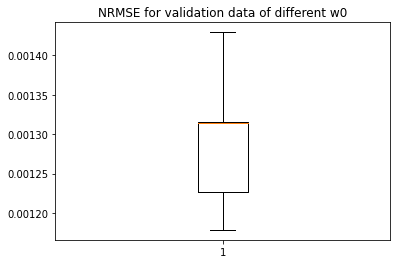

Text(0, 0.5, 'NRMSE')

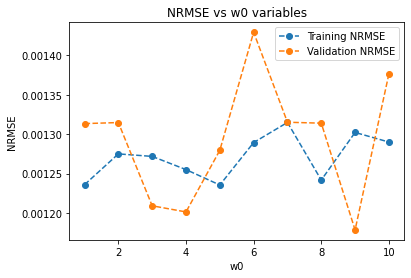

In [548]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_c])  #passing data array to boxplot
plt.title("NRMSE for training data of different w0")
plt.show()

plt.boxplot([NRMSE_val_list_c]) #passing data array to boxplot
plt.title("NRMSE for validation data of different w0")
plt.show()



plt.figure() #
plt.plot(w0_list,NRMSE_train_list_c,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of variables
plt.plot(w0_list,NRMSE_val_list_c,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against number of variables
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs w0 variables")
plt.xlabel("w0")
plt.ylabel("NRMSE")

**c) Training and validation NRMSE obtained using pseudo inverse with noise variance [2]**

we will keep variables and inputs as previous one and vary the variance from 1,2,3,...10

In [549]:
no_of_variables_d=50  #50 number of variables/features for various dataset lengths
dataset_length_d=1000 # number of inputs
runs_c=10 #create 10 different datasets

var_list=[1,2,3,4,5,6,7,8,9,10] #different values of noise variance

X_dataset_list_d=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_d=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_d=[] #will contain training dataset for input
X_dataset_val_list_d=[] #this will conrain validation dataset for input

t_dataset_train_list_d=[] #will contain training dataset for t
t_dataset_val_list_d=[] #this will conrain validation dataset for t

original_weights_d= np.random.randint(low=-10,high=10,size=no_of_variables_d) #true weights, which will be used to generate t

w0_data=np.random.randint(low=-10,high=10) #generate noise variance randomly between -2 and 2
X_data=np.random.randint(low=-10,high=10,size=(dataset_length_d,no_of_variables_d))#random X array of shape: ip size x features

#lets first generate datasets
for i in range(len(var_list)):
  
  np.random.seed(i+40)    #set random seed

 
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
  
  noise_var_data=var_list[i] #select variance value from the list

  t_data=generate_t(X_data,original_weights_d,w0_data,var_list[i])


  #append X and t to respective lists
  X_dataset_list_d.append(X_data)
  t_dataset_list_d.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(var_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_d)
  b=int(0.80*dataset_length_d)
  c=int(dataset_length_d)




  #array slicing
  X_data_train=X_dataset_list_d[i][:a,:]
  X_data_val=  X_dataset_list_d[i][b:c,:]
  #append to list
  X_dataset_train_list_d.append(X_data_train)
  X_dataset_val_list_d.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(var_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_d[i][0:int(0.8*dataset_length_d)]
  t_data_val=  t_dataset_list_d[i][int(0.8*dataset_length_d):dataset_length_d]

  #append to the list

  t_dataset_train_list_d.append(t_data_train)
  t_dataset_val_list_d.append(t_data_val)




In [550]:
weight_list_d=[]   #list to store w matrix for various datasets
NRMSE_train_list_d=[] #list to store nrmse  for various datasets
output_train_list_d=[] #list to store outputs  for various datasets

NRMSE_val_list_d=[] #list to store validation nrmse  for various datasets
output_val_list_d=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

for i in range (len(no_of_variables)):

  
  weights_d,output_train_d,mse_train_d=pseudo_inv_L2 (X_dataset_train_list_d[i],t_dataset_train_list_d[i],lamda_value)
  

  #calculate nrmse from mse
  nrmse_train= np.sqrt(mse_train_d)/np.std(t_dataset_train_list_d[i])

  #append to the list respective return values

  weight_list_d.append(weights_d)
  NRMSE_train_list_d.append(nrmse_train)

  output_train_list_d.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(dataset_length)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_d[i],weight_list_d[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_d[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_d.append(nrmse_val)

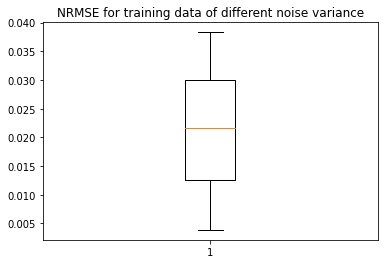

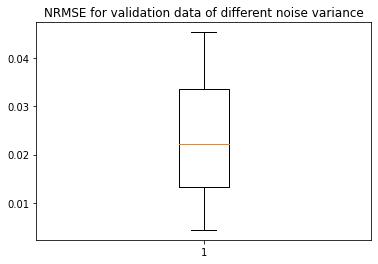

Text(0, 0.5, 'NRMSE')

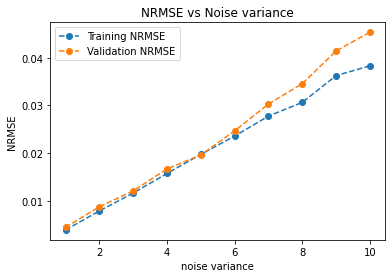

In [551]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_d])  #passing data array to boxplot
plt.title("NRMSE for training data of different noise variance")
plt.show()

plt.boxplot([NRMSE_val_list_d]) #passing data array to boxplot
plt.title("NRMSE for validation data of different noise variance")
plt.show()



plt.figure() #
plt.plot(var_list,NRMSE_train_list_d,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of variables
plt.plot(var_list,NRMSE_val_list_d,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against number of variables
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs Noise variance")
plt.xlabel("noise variance")
plt.ylabel("NRMSE")

Its a clear linear rising trend , and it makes sense that, as variance increases, the randomness in the target values increases due to which our solution cant go near to the ideal solution

**e) Training and validation NRMSE obtained using pseudo inverse with lambda2 [2]**

This time we will vary the lambda in range 0.1 to 10 in steps on 0.1

In [552]:
no_of_variables_e=50  #50 number of variables/features for various dataset lengths
dataset_length_e=1000 # number of inputs
runs_c=10 #create 10 different datasets

lamda_list=[0.001,0.01,0.1,1,10,] #different values of noise variance

X_dataset_list_e=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_e=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_e=[] #will contain training dataset for input
X_dataset_val_list_e=[] #this will conrain validation dataset for input

t_dataset_train_list_e=[] #will contain training dataset for t
t_dataset_val_list_e=[] #this will conrain validation dataset for t

original_weights_e= np.random.randint(low=-10,high=10,size=no_of_variables_e) #true weights, which will be used to generate t

X_data=np.random.randint(low=-10,high=10,size=(dataset_length_e,no_of_variables_e))#random X array of shape: ip size x features
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
w0_data=np.random.randint(low=-10,high=10) #generate w0 randomly between -2 and 2
noise_var_data=0.1*np.random.randint(low=0,high=10) #generate noise variance randomly between 0.1 and 1 



#lets first generate datasets
for i in range(len(lamda_list)):
  
  np.random.seed(i+35)    #set random seed

  
  t_data=generate_t(X_data,original_weights_e,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_e.append(X_data)
  t_dataset_list_e.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(lamda_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_e)
  b=int(0.80*dataset_length_e)
  c=int(dataset_length_e)




  #array slicing
  X_data_train=X_dataset_list_e[i][:a,:]
  X_data_val=  X_dataset_list_e[i][b:c,:]
  #append to list
  X_dataset_train_list_e.append(X_data_train)
  X_dataset_val_list_e.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(lamda_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_e[i][0:int(0.8*dataset_length_e)]
  t_data_val=  t_dataset_list_e[i][int(0.8*dataset_length_e):dataset_length_e]

  #append to the list

  t_dataset_train_list_e.append(t_data_train)
  t_dataset_val_list_e.append(t_data_val)




In [553]:
weight_list_e=[]   #list to store w matrix for various datasets
NRMSE_train_list_e=[] #list to store nrmse  for various datasets
output_train_list_e=[] #list to store outputs  for various datasets

NRMSE_val_list_e=[] #list to store validation nrmse  for various datasets
output_val_list_e=[] #list to store training outputs  for various datasets


for i in range (len(lamda_list)):

  lamda_value=lamda_list[i] #generate lamda randomly between 0 and 1

  weights_e,output_train_e,mse_train_e=pseudo_inv_L2 (X_dataset_train_list_e[i],t_dataset_train_list_e[i],lamda_value)
  

  #calculate nrmse from mse
  nrmse_train= np.sqrt(mse_train_e)/np.std(t_dataset_train_list_e[i])

  #append to the list respective return values

  weight_list_e.append(weights_e)
  NRMSE_train_list_e.append(nrmse_train)

  output_train_list_e.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(lamda_list)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_e[i],weight_list_e[i])
  
  
  
  mse_val=calc_MSE(output_val,t_dataset_val_list_e[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)
  
  NRMSE_val_list_e.append(nrmse_val)

Text(0, 0.5, 'NRMSE')

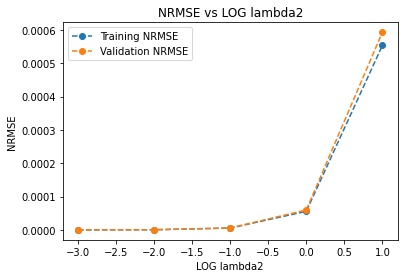

In [554]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_e])  #passing data array to boxplot
plt.title("NRMSE for training data of different lamda values")
plt.show()

plt.boxplot([NRMSE_val_list_e]) #passing data array to boxplot
plt.title("NRMSE for validation data of different lamda values")
plt.show()



plt.figure() #
plt.plot(np.log10(lamda_list),NRMSE_train_list_e,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of variables
plt.plot(np.log10(lamda_list),NRMSE_val_list_e,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against number of variables
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs LOG lambda2")
plt.xlabel("LOG lambda2")
plt.ylabel("NRMSE")

In [555]:
NRMSE_train_list_e

[5.595291833028282e-08,
 5.595239970321121e-07,
 5.594721499386255e-06,
 5.589547705229783e-05,
 0.0005538881217404455]

When we increase the lambda, that is the regularization hyperparameter, increases, the value of the variables start to decrease (the soliution starts to go to wards the center of feature space), therefore that might be the possible reason behind increase in the error

**f.Time taken to solve pseudo inverse with number of samples and number of variables and its breaking points [2]**

We will do similar to part b. We will fix input samples to 10,000 and vary number of variables as 10,20,30,40...100 and calculate the time

In [556]:
no_of_variables=[10,20,30,40,50,60,70,80,90,100] #list of variables/features for various dataset lengths
dataset_length_f=10000 # number of inputs

X_dataset_list_f=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_f=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_f=[] #will contain training dataset for input
X_dataset_val_list_f=[] #this will conrain validation dataset for input

t_dataset_train_list_f=[] #will contain training dataset for t
t_dataset_val_list_f=[] #this will conrain validation dataset for t



#lets first generate datasets
for i in range(len(no_of_variables)):
  original_weights_f=np.random.randint(low=-10,high=10,size=no_of_variables[i]) #true weights, which will be used to generate t

  np.random.seed(i+15)    #set random seed

  X_data=np.random.randint(low=-10,high=10,size=(dataset_length_f,no_of_variables[i]))#random X array of shape: ip size x features
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length_b)) #random t array of shape: features
  

  w0_data=0.1*np.random.randint(low=-10,high=10) #generate w0 randomly between -10 and 10
  noise_var=0.1*np.random.randint(low=-200,high=200) #generate noise variance randomly between -2 and 2

  t_data=generate_t(X_data,original_weights_f,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_f.append(X_data)
  t_dataset_list_f.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(no_of_variables)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_f)
  b=int(0.80*dataset_length_f)
  c=int(dataset_length_f)




  #array slicing
  X_data_train=X_dataset_list_f[i][:a,:]
  X_data_val=  X_dataset_list_f[i][b:c,:]
  #append to list
  X_dataset_train_list_f.append(X_data_train)
  X_dataset_val_list_f.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(no_of_variables)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_f[i][0:int(0.8*dataset_length_f)]
  t_data_val=  t_dataset_list_f[i][int(0.8*dataset_length_f):dataset_length_f]

  #append to the list

  t_dataset_train_list_f.append(t_data_train)
  t_dataset_val_list_f.append(t_data_val)




In [557]:
#the code for calculating the time difference is taken from: https://stackoverflow.com/questions/1557571/how-do-i-get-time-of-a-python-programs-execution

import time #time library

weight_list_f=[]   #list to store w matrix for various datasets
NRMSE_train_list_f=[] #list to store nrmse  for various datasets
output_train_list_f=[] #list to store outputs  for various datasets

NRMSE_val_list_f=[] #list to store validation nrmse  for various datasets
output_val_list_f=[] #list to store training outputs  for various datasets

executionTime_train_list=[]
executionTime_val_list=[]

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

for i in range (len(no_of_variables)):

  start_time = time.time()

  weights_f,output_train_f,mse_train_f=pseudo_inv_L2 (X_dataset_train_list_f[i],t_dataset_train_list_f[i],lamda_value)
  extime=time.time() - start_time

  #calculate nrmse from mse
  nrmse_train= np.sqrt(mse_train_f)/np.std(t_dataset_train_list_f[i])

  #append to the list respective return values

  weight_list_f.append(weights_f)
  NRMSE_train_list_f.append(nrmse_train)

  output_train_list_f.append(output_train)

  executionTime_train_list.append(extime)


# now using the weights on Validation data to calculate the validation predictions and NRMSE





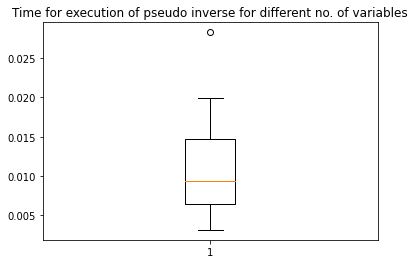

Text(0, 0.5, 'Time taken to execute (sec)')

In [558]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([executionTime_train_list])  #passing data array to boxplot
plt.title("Time for execution of pseudo inverse for different no. of variables")
plt.show()

# plt.boxplot([NRMSE_val_list_b]) #passing data array to boxplot
# plt.title("NRMSE for validation data of different no. of variables")
# plt.show()



plt.figure() #
plt.plot(no_of_variables,executionTime_train_list,label='training data',linestyle='--', marker='o') #plot the time against number of variables

#giving titles to axes and plot 
plt.title("Time taken to exectue vs number of variables")
plt.xlabel("Number of variables")
plt.ylabel("Time taken to execute (sec)")

We can see a clear,almost linerly increasing trend here since more number of variables make the matrix bigger

**g) Training and validation NRMSE obtained using gradient descent with max_iter [2]**

We will calculate training and validation nrmse for max iter = 100,200,....1000. Using 1000 samples and 50 variables/features

In [559]:
no_of_variables_g=50  #50 number of variables/features for various dataset lengths
dataset_length_g=1000 # number of inputs
runs_c=10 #create 10 different datasets

max_iter_list=[10,20,30,40,50,60,70,80,90,100] #different values of maximum iterations

X_dataset_list_g=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_g=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_g=[] #will contain training dataset for input
X_dataset_val_list_g=[] #this will conrain validation dataset for input

t_dataset_train_list_g=[] #will contain training dataset for t
t_dataset_val_list_g=[] #this will conrain validation dataset for t

original_weights_g= np.random.randint(low=-10,high=10,size=no_of_variables_g) #true weights, which will be used to generate t
X_data=np.random.randint(low=-10,high=10,size=(dataset_length_g,no_of_variables_g))#random X array of shape: ip size x features
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
w0_data=np.random.randint(low=-10,high=10) #generate noise variance randomly between -2 and 2
noise_var_data=0.01*np.random.randint(low=0,high=4000) #generate noise variance randomly between 0 and 40

#lets first generate datasets
for i in range(len(max_iter_list)):
  
  np.random.seed(i+40)    #set random seed

  

  t_data=generate_t(X_data,original_weights_g,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_g.append(X_data)
  t_dataset_list_g.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(max_iter_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_g)
  b=int(0.80*dataset_length_g)
  c=int(dataset_length_g)




  #array slicing
  X_data_train=X_dataset_list_g[i][:a,:]
  X_data_val=  X_dataset_list_g[i][b:c,:]
  #append to list
  X_dataset_train_list_g.append(X_data_train)
  X_dataset_val_list_g.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(max_iter_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_g[i][0:int(0.8*dataset_length_g)]
  t_data_val=  t_dataset_list_g[i][int(0.8*dataset_length_g):dataset_length_g]

  #append to the list

  t_dataset_train_list_g.append(t_data_train)
  t_dataset_val_list_g.append(t_data_val)




In [560]:
weight_list_g=[]   #list to store w matrix for various datasets
NRMSE_train_list_g=[] #list to store nrmse  for various datasets
output_train_list_g=[] #list to store outputs  for various datasets

NRMSE_val_list_g=[] #list to store validation nrmse  for various datasets
output_val_list_g=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

min_change_NRMSE_data=0.001 #lets keep min change in nrmse as 0.01


for i in range (len(max_iter_list)):

  
  # weights_g,output_train_d,mse_train_g=pseudo_inv_L2 (X_dataset_train_list_d[i],t_dataset_train_list_d[i],lamda_value)
  w_initial=np.random.normal(0, 1, (no_of_variables_g+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)
  eta_data=0.001 #eta fixed to 0.001
  weights_g,output_train_d,nrmse_train_g=grad_des(X_dataset_train_list_g[i],t_dataset_train_list_g[i],w_initial,eta_data,max_iter_list[i],min_change_NRMSE_data,lamda2=0,lamda1=0)#calling grad descend function passing on these parameters


  #calculate nrmse from mse
  nrmse_train= nrmse_train_g #nrmse returned by function

  #append to the list respective return values

  weight_list_g.append(weights_g)
  NRMSE_train_list_g.append(nrmse_train)

  output_train_list_g.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(max_iter_list)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_g[i],weight_list_g[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_g[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_g.append(nrmse_val)


 stopped after 10th iteration

 stopped after 20th iteration

 stopped after 30th iteration

 stopped after 40th iteration

 stopped after 50th iteration

 stopped after 60th iteration

 stopped after 68th iteration

 stopped after 69th iteration

 stopped after 68th iteration

 stopped after 69th iteration


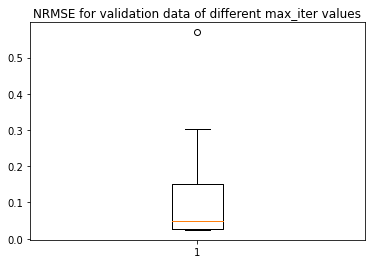

Text(0, 0.5, 'NRMSE')

In [561]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_g])  #passing data array to boxplot
plt.title("NRMSE for training data of different max_iter values")
plt.show()

plt.boxplot([NRMSE_val_list_g]) #passing data array to boxplot
plt.title("NRMSE for validation data of different max_iter values")
plt.show()



plt.figure() #
plt.plot(max_iter_list,NRMSE_train_list_g,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of max iterations #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.plot(max_iter_list,NRMSE_val_list_g,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against number of max iterations #reference: https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs max iterations")
plt.xlabel("max iterations")
plt.ylabel("NRMSE")

In [562]:
NRMSE_train_list_g,NRMSE_val_list_g

([0.5342865042503039,
  0.2818649583858942,
  0.15202097279586316,
  0.08866278370945392,
  0.0526635571263606,
  0.03283127942052036,
  0.021971878753354723,
  0.022790661252446394,
  0.023094464669754938,
  0.021834234634060125],
 [0.5699340026085329,
  0.30156434829680634,
  0.16742447770904625,
  0.10026118960688671,
  0.06005250809802539,
  0.03687767486479841,
  0.024557117927569157,
  0.02676945479112159,
  0.0254392661888374,
  0.02428075109103663])

More number of iterations decrease the NRMSE since the weeight can be corrected for more number of iterations, however, the curve saturates when the number of iterations are large enough

**h) Training and validation NRMSE obtained using gradient descent with eta [2]**

We will vary eta on log scale like 0.00001,0.0001,0.001,0.01,0.1

In [563]:
no_of_variables_h=50  #50 number of variables/features for various dataset lengths
dataset_length_h=1000 # number of inputs
runs_c=10 #create 10 different datasets

eta_list=[0.00001,0.0001,0.001,0.01,0.1]#different values of maximum iterations

X_dataset_list_h=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_h=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_h=[] #will contain training dataset for input
X_dataset_val_list_h=[] #this will conrain validation dataset for input

t_dataset_train_list_h=[] #will contain training dataset for t
t_dataset_val_list_h=[] #this will conrain validation dataset for t

original_weights_h= np.random.randint(low=-10,high=10,size=no_of_variables_h) #true weights, which will be used to generate t

X_data=np.random.randint(low=-10,high=10,size=(dataset_length_h,no_of_variables_h))#random X array of shape: ip size x features

  
w0_data=np.random.randint(low=-10,high=10) #generate noise variance randomly between -2 and 2
noise_var_data=0.01*np.random.randint(low=0,high=4000) #generate noise variance randomly between 0 and 40

#lets first generate datasets
for i in range(len(eta_list)):
  
  np.random.seed(i+40)    #set random seed




  t_data=generate_t(X_data,original_weights_h,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_h.append(X_data)
  t_dataset_list_h.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(eta_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_h)
  b=int(0.80*dataset_length_h)
  c=int(dataset_length_h)




  #array slicing
  X_data_train=X_dataset_list_h[i][:a,:]
  X_data_val=  X_dataset_list_h[i][b:c,:]
  #append to list
  X_dataset_train_list_h.append(X_data_train)
  X_dataset_val_list_h.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(eta_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_h[i][0:int(0.8*dataset_length_h)]
  t_data_val=  t_dataset_list_h[i][int(0.8*dataset_length_h):dataset_length_h]

  #append to the list

  t_dataset_train_list_h.append(t_data_train)
  t_dataset_val_list_h.append(t_data_val)




In [564]:
weight_list_h=[]   #list to store w matrix for various datasets
NRMSE_train_list_h=[] #list to store nrmse  for various datasets
output_train_list_h=[] #list to store outputs  for various datasets

NRMSE_val_list_h=[] #list to store validation nrmse  for various datasets
output_val_list_h=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

min_change_NRMSE_data=0.001 #lets keep min change in nrmse as 0.01


max_iter=100 #keep maximum iterations fixed to 1000

for i in range (len(eta_list)):

  
  # weights_g,output_train_d,mse_train_g=pseudo_inv_L2 (X_dataset_train_list_d[i],t_dataset_train_list_d[i],lamda_value)
  w_initial=np.random.normal(0, 1, (no_of_variables_h+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)
 
  weights_h,output_train_h,nrmse_train_h= grad_des(X_dataset_train_list_h[i],t_dataset_train_list_h[i],w_initial,eta_list[i],max_iter,min_change_NRMSE_data,lamda2=0,lamda1=0)#calling grad descend function passing on these parameters


  #calculate nrmse from mse
  nrmse_train= nrmse_train_h #nrmse returned by function

  #append to the list respective return values

  weight_list_h.append(weights_h)
  NRMSE_train_list_h.append(nrmse_train)

  output_train_list_h.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(eta_list)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_h[i],weight_list_h[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_h[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_h.append(nrmse_val)


 stopped after 2th iteration

 stopped after 100th iteration

 stopped after 50th iteration

 stopped after 6th iteration

 stopped after 100th iteration


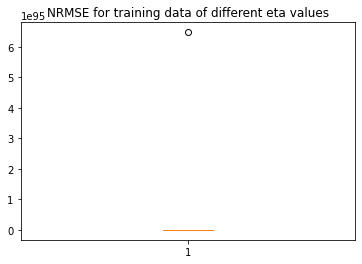

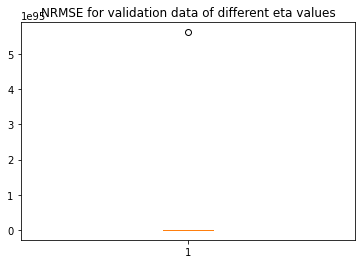

Text(0, 0.5, 'NRMSE')

In [565]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_h])  #passing data array to boxplot
plt.title("NRMSE for training data of different eta values")
plt.show()

plt.boxplot([NRMSE_val_list_h]) #passing data array to boxplot
plt.title("NRMSE for validation data of different eta values")
plt.show()



plt.figure() #
plt.plot(np.log10(eta_list),NRMSE_train_list_h,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of max iterations #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.plot(np.log10(eta_list),NRMSE_val_list_h,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against number of max iterations #reference: https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs log(eta)")
plt.xlabel("log(eta)")
plt.ylabel("NRMSE")

In [566]:
NRMSE_train_list_h,NRMSE_val_list_h

([1.0293125156943317,
  0.4883731065797724,
  0.10213344742573978,
  0.0930934981585121,
  6.477104748196773e+95],
 [1.0432980209792535,
  0.5136402552527887,
  0.11266817570027564,
  0.1047984429079818,
  5.618201191040121e+95])

Smaller eta makes sure that steps in the grad descend corrections are small enough to not miss minimma.

However as the steps get larger, the error once again shoots up  since minimma can never be reached 


In [567]:
NRMSE_train_list_h,NRMSE_val_list_h

([1.0293125156943317,
  0.4883731065797724,
  0.10213344742573978,
  0.0930934981585121,
  6.477104748196773e+95],
 [1.0432980209792535,
  0.5136402552527887,
  0.11266817570027564,
  0.1047984429079818,
  5.618201191040121e+95])

**i) Time taken to solve gradient descent with number of samples and number of variables and its breaking points [2]**

We will keep the number of variables fixed to 25 and vary the number of inputs as 100,200,...,1000 (similar to 'a') and measure the time for the same

From above expt, we can say that eta value 0.01 is optimal, so we will use that henceforth

In [568]:
no_of_features=25
# dataset_length=np.array([100,200,300,400,500,600,700,800,900,1000])
dataset_length=np.array([100,1000,10000,100000,1000000])
# dataset_length=np.array([100000000]) #this one to test the limit, at 100000000 the google colab ran out of RAM

X_dataset_list=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list=[] #will contain training dataset for input
X_dataset_val_list=[] #this will conrain validation dataset for input

t_dataset_train_list=[] #will contain training dataset for t
t_dataset_val_list=[] #this will conrain validation dataset for t

original_weights_a=np.random.randint(low=-10,high=10,size=no_of_features) #true weights, which will be used to generate t


#lets first generate datasets
for i in range(len(dataset_length)):
  
  X_data=np.random.randint(low=-10,high=10,size=(dataset_length[i],no_of_features))#random X array of shape: ip size x features
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length[i])) #random t array of shape: features
  w0_data=0.1*np.random.randint(low=-10,high=10) #generate w0 randomly between -10 and 10
  noise_var=0.1*np.random.randint(low=-200,high=200) #generate noise variance randomly between -2 and 2

  t_data=generate_t(X_data,original_weights_a,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list.append(X_data)
  t_dataset_list.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(dataset_length)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length[i])
  b=int(0.80*dataset_length[i])
  c=int(dataset_length[i])


  # curr_dataset=X_dataset_list[i]

  # X_data_train=curr_dataset[:a,:]
  # X_data_val=curr_dataset[b:c,:]



  X_data_train=X_dataset_list[i][:a,:]
  X_data_val=  X_dataset_list[i][b:c,:]

  X_dataset_train_list.append(X_data_train)
  X_dataset_val_list.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(dataset_length)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length[i])
  b=int(0.80*dataset_length[i]+1)
  c=int(dataset_length[i])


  # curr_dataset=X_dataset_list[i]

  # X_data_train=curr_dataset[:a,:]
  # X_data_val=curr_dataset[b:c,:]



  
  #slice the array in such a way such that dataset is split into 80:20 

  t_data_train=t_dataset_list[i][0:int(0.8*dataset_length[i])]
  t_data_val=  t_dataset_list[i][int(0.8*dataset_length[i]):dataset_length[i]]

  #append to the list

  t_dataset_train_list.append(t_data_train)
  t_dataset_val_list.append(t_data_val)

















In [569]:
weight_list=[]   #list to store w matrix for various datasets
NRMSE_train_list=[] #list to store nrmse  for various datasets
output_train_list=[] #list to store outputs  for various datasets

NRMSE_val_list=[] #list to store validation nrmse  for various datasets
output_val_list=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

extime_list_i=[]

eta_data=0.01
max_iter=1000
w_initial=np.random.normal(0, 1, (no_of_features+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)
  
min_change_NRMSE_data=0.01

for i in range (len(dataset_length)):

  start_time = time.time()
  # weights,output_train,mse_train=pseudo_inv_L2 (X_dataset_train_list[i],t_dataset_train_list[i],lamda_value)
  weights,output_train,nrmse_train= grad_des(X_dataset_train_list[i],t_dataset_train_list[i],w_initial,eta_data,max_iter,min_change_NRMSE_data,lamda2=0,lamda1=0)#calling grad descend function passing on these parameters

  

  
  extime=time.time() - start_time




  #calculate nrmse from mse
  nrmse_train= nrmse_train

  #append to the list respective return values

  weight_list.append(weights)
  NRMSE_train_list.append(nrmse_train)

  output_train_list.append(output_train)
  extime_list_i.append(extime)

# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(dataset_length)):
  #first make the predictions using weights obtained on train data
  output_val=LinearReg(X_dataset_val_list[i],weight_list[i])
  

  mse_val=calc_MSE(output_val,t_dataset_val_list[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_dataset_val_list[i])

  NRMSE_val_list.append(nrmse_val)

  
  

  






 stopped after 7th iteration

 stopped after 5th iteration

 stopped after 4th iteration

 stopped after 4th iteration

 stopped after 4th iteration


Text(0, 0.5, 'execution time')

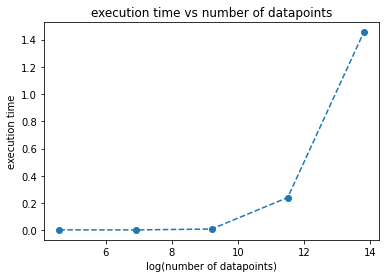

In [570]:
plt.figure() #
plt.plot(np.log(dataset_length),extime_list_i,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of max iterations #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
# plt.plot(dataset_length,extime_list_i,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of max iterations #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib

#giving titles to axes and plot 
plt.title("execution time vs number of datapoints")
# plt.xlabel("number of datapoints")
plt.xlabel("log(number of datapoints)")
plt.ylabel("execution time")

As the datapoints increase, the time increases since gradient calculations require more and more time

In [571]:
extime_list_i

[0.003143310546875,
 0.0027751922607421875,
 0.009305000305175781,
 0.24036455154418945,
 1.4537358283996582]

at 100000000 google colab ran out of RAM

**j) Time taken to solve gradient descent with number of variables and its breaking point [2]**

we will keep number of samples fixed at 10,000 and try for number of variables 10,20,.....,100

In [572]:
no_of_features=[10,20,30,40,50,60,70,80,90,100]
dataset_length=10000

X_dataset_list=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list=[] #will contain training dataset for input
X_dataset_val_list=[] #this will conrain validation dataset for input

t_dataset_train_list=[] #will contain training dataset for t
t_dataset_val_list=[] #this will conrain validation dataset for t



#lets first generate datasets
for i in range(len(no_of_features)):
  
  X_data=np.random.randint(low=-10,high=10,size=(dataset_length,no_of_features[i]))#random X array of shape: ip size x features
  # t_data=np.random.randint(low=-10,high=10,size=(dataset_length[i])) #random t array of shape: features
  w0_data=0.1*np.random.randint(low=-10,high=10) #generate w0 randomly between -10 and 10
  noise_var=0.1*np.random.randint(low=-200,high=200) #generate noise variance randomly between -2 and 2
  original_weights_a=np.random.randint(low=-10,high=10,size=no_of_features[i]) #true weights, which will be used to generate t

  t_data=generate_t(X_data,original_weights_a,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list.append(X_data)
  t_dataset_list.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(no_of_features)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length)
  b=int(0.80*dataset_length)
  c=int(dataset_length)


  # curr_dataset=X_dataset_list[i]

  # X_data_train=curr_dataset[:a,:]
  # X_data_val=curr_dataset[b:c,:]



  X_data_train=X_dataset_list[i][:a,:]
  X_data_val=  X_dataset_list[i][b:c,:]

  X_dataset_train_list.append(X_data_train)
  X_dataset_val_list.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(no_of_features)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length)
  b=int(0.80*dataset_length+1)
  c=int(dataset_length)


  # curr_dataset=X_dataset_list[i]

  # X_data_train=curr_dataset[:a,:]
  # X_data_val=curr_dataset[b:c,:]



  
  #slice the array in such a way such that dataset is split into 80:20 

  t_data_train=t_dataset_list[i][0:int(0.8*dataset_length)]
  t_data_val=  t_dataset_list[i][int(0.8*dataset_length):dataset_length]

  #append to the list

  t_dataset_train_list.append(t_data_train)
  t_dataset_val_list.append(t_data_val)

















In [573]:
weight_list=[]   #list to store w matrix for various datasets
NRMSE_train_list=[] #list to store nrmse  for various datasets
output_train_list=[] #list to store outputs  for various datasets

NRMSE_val_list=[] #list to store validation nrmse  for various datasets
output_val_list=[] #list to store training outputs  for various datasets

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

extime_list_i=[]

eta_data=0.01
max_iter=1000
  
min_change_NRMSE_data=0.001

for i in range (len(no_of_features)):
  w_initial=np.random.normal(0, 1, (no_of_features[i]+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)

  start_time = time.time()
  # weights,output_train,mse_train=pseudo_inv_L2 (X_dataset_train_list[i],t_dataset_train_list[i],lamda_value)
  weights,output_train,nrmse_train= grad_des(X_dataset_train_list[i],t_dataset_train_list[i],w_initial,eta_data,max_iter,min_change_NRMSE_data,lamda2=0,lamda1=0)#calling grad descend function passing on these parameters

  

  
  extime=time.time() - start_time




  #calculate nrmse from mse
  nrmse_train= nrmse_train

  #append to the list respective return values

  weight_list.append(weights)
  NRMSE_train_list.append(nrmse_train)

  output_train_list.append(output_train)
  extime_list_i.append(extime)

# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(no_of_features)):
  #first make the predictions using weights obtained on train data
  output_val=LinearReg(X_dataset_val_list[i],weight_list[i])
  

  mse_val=calc_MSE(output_val,t_dataset_val_list[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_dataset_val_list[i])

  NRMSE_val_list.append(nrmse_val)

  
  

  






 stopped after 5th iteration

 stopped after 5th iteration

 stopped after 5th iteration

 stopped after 5th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration


Text(0, 0.5, 'execution time')

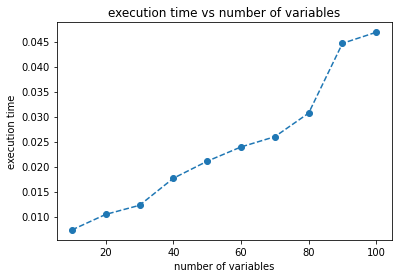

In [574]:
plt.figure() #
plt.plot(no_of_features,extime_list_i,label='training data',linestyle='--', marker='o') #plot the execution time against number of variables #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
# plt.plot(dataset_length,extime_list_i,label='training data',linestyle='--', marker='o') #plot the training nrmse against number of max iterations #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib

#giving titles to axes and plot 
plt.title("execution time vs number of variables")
# plt.xlabel("number of datapoints")
plt.xlabel("number of variables")
plt.ylabel("execution time")

Again, the graph is of increasing nature with near-linear curve

When number of variables was made 1000, it took more than 1 minute to execute

**k) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda2 [2]**

We will use 25 features, 1000 inputs and will keep lamda1=0 for this experiment

for nearly 0,we will consider those weights who's value is less than 0.001

In [575]:
no_of_variables_h=25  #25 number of variables/features for various dataset lengths
dataset_length_h=10000 # number of inputs
runs_c=10 #create 10 different datasets

lamda2_list=[0.0001,0.001,0.01,0.1,1,10] #different values of maximum iterations

X_dataset_list_h=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_h=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_h=[] #will contain training dataset for input
X_dataset_val_list_h=[] #this will conrain validation dataset for input

t_dataset_train_list_h=[] #will contain training dataset for t
t_dataset_val_list_h=[] #this will conrain validation dataset for t

original_weights_h= np.random.randint(low=-10,high=10,size=no_of_variables_h) #true weights, which will be used to generate t
X_data=np.random.randint(low=-10,high=10,size=(dataset_length_h,no_of_variables_h))#random X array of shape: ip size x features
# t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
w0_data=np.random.randint(low=-10,high=10) #generate noise variance randomly between -2 and 2
noise_var_data=0.01*np.random.randint(low=0,high=40) #generate noise variance randomly between 0 and 40

#lets first generate datasets
for i in range(len(lamda2_list)):
  
  np.random.seed(i+40)    #set random seed



  t_data=generate_t(X_data,original_weights_h,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_h.append(X_data)
  t_dataset_list_h.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(lamda2_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_h)
  b=int(0.80*dataset_length_h)
  c=int(dataset_length_h)




  #array slicing
  X_data_train=X_dataset_list_h[i][:a,:]
  X_data_val=  X_dataset_list_h[i][b:c,:]
  #append to list
  X_dataset_train_list_h.append(X_data_train)
  X_dataset_val_list_h.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(lamda2_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_h[i][0:int(0.8*dataset_length_h)]
  t_data_val=  t_dataset_list_h[i][int(0.8*dataset_length_h):dataset_length_h]

  #append to the list

  t_dataset_train_list_h.append(t_data_train)
  t_dataset_val_list_h.append(t_data_val)




In [576]:
weight_list_h=[]   #list to store w matrix for various datasets
NRMSE_train_list_h=[] #list to store nrmse  for various datasets
output_train_list_h=[] #list to store outputs  for various datasets

NRMSE_val_list_h=[] #list to store validation nrmse  for various datasets
output_val_list_h=[] #list to store training outputs  for various datasets

nearly_zero_weight_list=[]

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

min_change_NRMSE_data=0.001 #lets keep min change in nrmse as 0.01


max_iter=100 #keep maximum iterations fixed to 1000
eta_data=0.01 #since it seems to be ideal
w_initial=np.random.normal(0, 1, (no_of_variables_h+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)
 
for i in range (len(lamda2_list)):

  
  # weights_g,output_train_d,mse_train_g=pseudo_inv_L2 (X_dataset_train_list_d[i],t_dataset_train_list_d[i],lamda_value)
  
  weights_h,output_train_h,nrmse_train_h= grad_des(X_dataset_train_list_h[i],t_dataset_train_list_h[i],w_initial,eta_data,max_iter,min_change_NRMSE_data,lamda2=lamda2_list[i],lamda1=0)#calling grad descend function passing on these parameters


  #calculate nrmse from mse
  nrmse_train= nrmse_train_h #nrmse returned by function

  #append to the list respective return values

  #calculate nearly zero weights using np.where utility and append it to list reference:https://stackoverflow.com/questions/12995937/count-all-values-in-a-matrix-less-than-a-value
  no_zero_weights= np.where(abs(weights_h) <0.5)[0].shape[0] # returns a tupple of locations where condition is satisfied
  nearly_zero_weight_list.append(no_zero_weights)

  weight_list_h.append(weights_h)
  NRMSE_train_list_h.append(nrmse_train)

  output_train_list_h.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(lamda2_list)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_h[i],weight_list_h[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_h[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_h.append(nrmse_val)


 stopped after 7th iteration

 stopped after 7th iteration

 stopped after 7th iteration

 stopped after 6th iteration

 stopped after 8th iteration

 stopped after 9th iteration


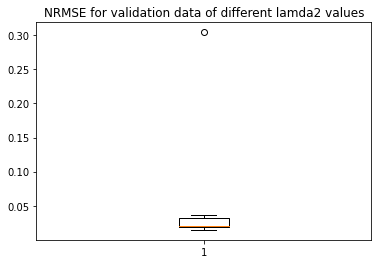

Text(0, 0.5, 'NRMSE')

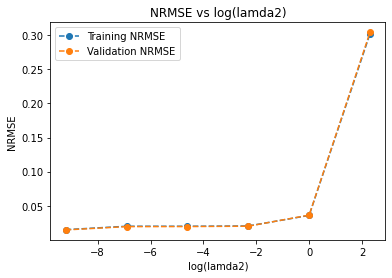

In [577]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_h])  #passing data array to boxplot
plt.title("NRMSE for training data of different lamda2 values")
plt.show()

plt.boxplot([NRMSE_val_list_h]) #passing data array to boxplot
plt.title("NRMSE for validation data of different lamda2 values")
plt.show()



plt.figure() #
plt.plot(np.log(lamda2_list),NRMSE_train_list_h,label='training data',linestyle='--', marker='o') #plot the training nrmse against lamda2 #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.plot(np.log(lamda2_list),NRMSE_val_list_h,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against lamda2 #reference: https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs log(lamda2)")
plt.xlabel("log(lamda2)")
plt.ylabel("NRMSE")

In [578]:
nearly_zero_weight_list

[0, 0, 0, 0, 0, 1]

Text(0, 0.5, 'Number of nearly zero weights')

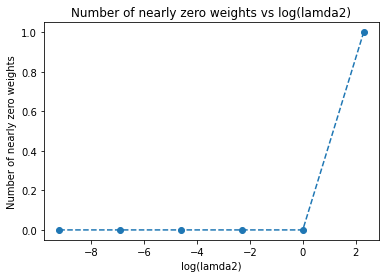

In [579]:
#now we plot number of nearly zero weights against lamda2

plt.figure() #
plt.plot(np.log(lamda2_list),nearly_zero_weight_list,label='training data',linestyle='--', marker='o') #plot the number of nearly zero weights against lamda2 #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
#giving titles to axes and plot 
plt.title("Number of nearly zero weights vs log(lamda2)")
plt.xlabel("log(lamda2)")
plt.ylabel("Number of nearly zero weights")


the values of weights obtained was very high (hardly any weights less than 1) therefore the result seems noisy

In [580]:
NRMSE_val_list_h

[0.014551320276903883,
 0.019397644764296125,
 0.019496424626806553,
 0.020010560082801263,
 0.0362229647981909,
 0.3043740229870824]

**l) Training and validation NRMSE and number of nearly zero weights obtained using gradient descent with lambda1 [2]**

We will do the same thing as above ,this time for lamda1

In [581]:
no_of_variables_h=25  #25 number of variables/features for various dataset lengths
dataset_length_h=10000 # number of inputs
runs_c=10 #create 10 different datasets

lamda1_list=[0.0001,0.001,0.01,0.1,1,10] #different values of lamda1
X_dataset_list_h=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_h=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_h=[] #will contain training dataset for input
X_dataset_val_list_h=[] #this will conrain validation dataset for input

t_dataset_train_list_h=[] #will contain training dataset for t
t_dataset_val_list_h=[] #this will conrain validation dataset for t

original_weights_h= np.random.randint(low=-10,high=10,size=no_of_variables_h) #true weights, which will be used to generate t

X_data=np.random.randint(low=-10,high=10,size=(dataset_length_h,no_of_variables_h))#random X array of shape: ip size x features
# t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
w0_data=np.random.randint(low=-10,high=10) #generate noise variance randomly between -2 and 2
noise_var_data=0.01*np.random.randint(low=0,high=40) #generate noise variance randomly between 0 and 40



#lets first generate datasets
for i in range(len(lamda1_list)):
  
  np.random.seed(i+40)    #set random seed



  t_data=generate_t(X_data,original_weights_h,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_h.append(X_data)
  t_dataset_list_h.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(lamda1_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_h)
  b=int(0.80*dataset_length_h)
  c=int(dataset_length_h)




  #array slicing
  X_data_train=X_dataset_list_h[i][:a,:]
  X_data_val=  X_dataset_list_h[i][b:c,:]
  #append to list
  X_dataset_train_list_h.append(X_data_train)
  X_dataset_val_list_h.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(lamda1_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_h[i][0:int(0.8*dataset_length_h)]
  t_data_val=  t_dataset_list_h[i][int(0.8*dataset_length_h):dataset_length_h]

  #append to the list

  t_dataset_train_list_h.append(t_data_train)
  t_dataset_val_list_h.append(t_data_val)




In [582]:
weight_list_h=[]   #list to store w matrix for various datasets
NRMSE_train_list_h=[] #list to store nrmse  for various datasets
output_train_list_h=[] #list to store outputs  for various datasets

NRMSE_val_list_h=[] #list to store validation nrmse  for various datasets
output_val_list_h=[] #list to store training outputs  for various datasets

nearly_zero_weight_list=[]

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

min_change_NRMSE_data=0.001 #lets keep min change in nrmse as 0.01


max_iter=100 #keep maximum iterations fixed to 1000
eta_data=0.01 #since it seems to be ideal
w_initial=np.random.normal(0, 1, (no_of_variables_h+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)
 
for i in range (len(lamda1_list)):

  
  # weights_g,output_train_d,mse_train_g=pseudo_inv_L2 (X_dataset_train_list_d[i],t_dataset_train_list_d[i],lamda_value)
  
  weights_h,output_train_h,nrmse_train_h= grad_des(X_dataset_train_list_h[i],t_dataset_train_list_h[i],w_initial,eta_data,max_iter,min_change_NRMSE_data,lamda2=0,lamda1=lamda1_list[i])#calling grad descend function passing on these parameters


  #calculate nrmse from mse
  nrmse_train= nrmse_train_h #nrmse returned by function

  #append to the list respective return values

  #calculate nearly zero weights using np.where utility and append it to list reference:https://stackoverflow.com/questions/12995937/count-all-values-in-a-matrix-less-than-a-value
  no_zero_weights= np.where(abs(weights_h) <0.1)[0].shape[0] # returns a tupple of locations where condition is satisfied
  nearly_zero_weight_list.append(no_zero_weights)

  weight_list_h.append(weights_h)
  NRMSE_train_list_h.append(nrmse_train)

  output_train_list_h.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(lamda1_list)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_h[i],weight_list_h[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_h[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_h.append(nrmse_val)


 stopped after 7th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 8th iteration

 stopped after 9th iteration


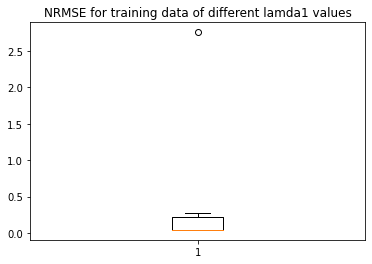

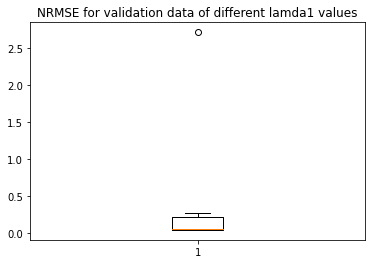

Text(0, 0.5, 'NRMSE')

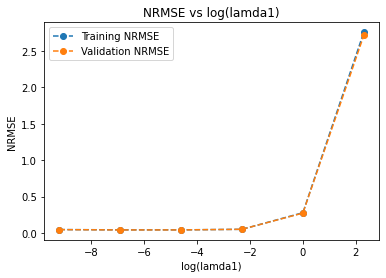

In [583]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_h])  #passing data array to boxplot
plt.title("NRMSE for training data of different lamda1 values")
plt.show()

plt.boxplot([NRMSE_val_list_h]) #passing data array to boxplot
plt.title("NRMSE for validation data of different lamda1 values")
plt.show()



plt.figure() #
plt.plot(np.log(lamda1_list),NRMSE_train_list_h,label='training data',linestyle='--', marker='o') #plot the training nrmse against lamda2 #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.plot(np.log(lamda1_list),NRMSE_val_list_h,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against lamda2 #reference: https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs log(lamda1)")
plt.xlabel("log(lamda1)")
plt.ylabel("NRMSE")

In [584]:
nearly_zero_weight_list

[1, 1, 1, 0, 0, 0]

In [585]:
#now we plot number of nearly zero weights against lamda2

plt.figure() #
plt.plot(np.log(lamda1_list),nearly_zero_weight_list,label='training data',linestyle='--', marker='o') #plot the number of nearly zero weights against lamda2 #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
#giving titles to axes and plot 
plt.title("Number of nearly zero weights vs log(lamda1)")
plt.xlabel("log(lamda1)")
plt.ylabel("Number of nearly zero weights")


Text(0, 0.5, 'Number of nearly zero weights')

the values of weights obtained was very high (hardly any weights less than 1) therefore the result seems noisy

In [586]:
NRMSE_val_list_h

[0.044869533735996184,
 0.040941157726072014,
 0.04106132138632362,
 0.04955843941381028,
 0.272217162951864,
 2.7133293800772287]

From above two experiments we can select the value of both lamda2 and lamda1 as 0.01

**m) Training and validation NRMSE for optimal lambda2 with noise variance [2]**

In [587]:
no_of_variables_h=25  #25 number of variables/features for various dataset lengths
dataset_length_h=10000 # number of inputs
runs_c=10 #create 10 different datasets

noise_var_list=[1,2,3,4,5,6,7,8,9,10] #different values of noise variance
X_dataset_list_h=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_h=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_h=[] #will contain training dataset for input
X_dataset_val_list_h=[] #this will conrain validation dataset for input

t_dataset_train_list_h=[] #will contain training dataset for t
t_dataset_val_list_h=[] #this will conrain validation dataset for t

original_weights_h= np.random.randint(low=-10,high=10,size=no_of_variables_h) #true weights, which will be used to generate t

X_data=np.random.randint(low=-10,high=10,size=(dataset_length_h,no_of_variables_h))#random X array of shape: ip size x features
# t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
w0_data=np.random.randint(low=-10,high=10) #generate noise variance randomly between -2 and 2




#lets first generate datasets
for i in range(len(noise_var_list)):
  
  np.random.seed(i+40)    #set random seed


  noise_var_data=noise_var_list[i] #generate noise variance from list
  t_data=generate_t(X_data,original_weights_h,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_h.append(X_data)
  t_dataset_list_h.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(noise_var_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_h)
  b=int(0.80*dataset_length_h)
  c=int(dataset_length_h)




  #array slicing
  X_data_train=X_dataset_list_h[i][:a,:]
  X_data_val=  X_dataset_list_h[i][b:c,:]
  #append to list
  X_dataset_train_list_h.append(X_data_train)
  X_dataset_val_list_h.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(noise_var_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_h[i][0:int(0.8*dataset_length_h)]
  t_data_val=  t_dataset_list_h[i][int(0.8*dataset_length_h):dataset_length_h]

  #append to the list

  t_dataset_train_list_h.append(t_data_train)
  t_dataset_val_list_h.append(t_data_val)




In [588]:
weight_list_h=[]   #list to store w matrix for various datasets
NRMSE_train_list_h=[] #list to store nrmse  for various datasets
output_train_list_h=[] #list to store outputs  for various datasets

NRMSE_val_list_h=[] #list to store validation nrmse  for various datasets
output_val_list_h=[] #list to store training outputs  for various datasets

nearly_zero_weight_list=[]

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

min_change_NRMSE_data=0.001 #lets keep min change in nrmse as 0.01


max_iter=100 #keep maximum iterations fixed to 1000
eta_data=0.01 #since it seems to be ideal
w_initial=np.random.normal(0, 1, (no_of_variables_h+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)
 
for i in range (len(noise_var_list)):

  
  # weights_g,output_train_d,mse_train_g=pseudo_inv_L2 (X_dataset_train_list_d[i],t_dataset_train_list_d[i],lamda_value)
  
  weights_h,output_train_h,nrmse_train_h= grad_des(X_dataset_train_list_h[i],t_dataset_train_list_h[i],w_initial,eta_data,max_iter,min_change_NRMSE_data,lamda2=0.01,lamda1=0)#calling grad descend function passing on these parameters


  #calculate nrmse from mse
  nrmse_train= nrmse_train_h #nrmse returned by function

  #append to the list respective return values

  #calculate nearly zero weights using np.where utility and append it to list reference:https://stackoverflow.com/questions/12995937/count-all-values-in-a-matrix-less-than-a-value
  no_zero_weights= np.where(abs(weights_h) <0.1)[0].shape[0] # returns a tupple of locations where condition is satisfied
  nearly_zero_weight_list.append(no_zero_weights)

  weight_list_h.append(weights_h)
  NRMSE_train_list_h.append(nrmse_train)

  output_train_list_h.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(noise_var_list)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_h[i],weight_list_h[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_h[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_h.append(nrmse_val)


 stopped after 7th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration


In [589]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_h])  #passing data array to boxplot
plt.title("NRMSE for training data of different noise variance values")
plt.show()

plt.boxplot([NRMSE_val_list_h]) #passing data array to boxplot
plt.title("NRMSE for validation data of different noise variance values")
plt.show()



plt.figure() #
plt.plot(noise_var_list,NRMSE_train_list_h,label='training data',linestyle='--', marker='o') #plot the training nrmse against lamda2 #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.plot(noise_var_list,NRMSE_val_list_h,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against lamda2 #reference: https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs (noise variance)")
plt.xlabel("(noise variance)")
plt.ylabel("NRMSE")

Text(0, 0.5, 'NRMSE')

**m) Training and validation NRMSE for optimal lambda1 with noise variance [2]**

Similar to above but using optimum value of lambda1

In [590]:
no_of_variables_h=25  #25 number of variables/features for various dataset lengths
dataset_length_h=10000 # number of inputs
runs_c=10 #create 10 different datasets

noise_var_list=[1,2,3,4,5,6,7,8,9,10] #different values of noise variance
X_dataset_list_h=[] # this list will contain input X datasets(inputs) of various sizes
t_dataset_list_h=[] # this list will contain output t datasets (output ground truth) of various sizes

X_dataset_train_list_h=[] #will contain training dataset for input
X_dataset_val_list_h=[] #this will conrain validation dataset for input

t_dataset_train_list_h=[] #will contain training dataset for t
t_dataset_val_list_h=[] #this will conrain validation dataset for t

original_weights_h= np.random.randint(low=-10,high=10,size=no_of_variables_h) #true weights, which will be used to generate t

X_data=np.random.randint(low=-10,high=10,size=(dataset_length_h,no_of_variables_h))#random X array of shape: ip size x features
# t_data=np.random.randint(low=-10,high=10,size=(dataset_length_c)) #random t array of shape: features
  
w0_data=np.random.randint(low=-10,high=10) #generate noise variance randomly between -2 and 2




#lets first generate datasets
for i in range(len(noise_var_list)):
  
  np.random.seed(i+40)    #set random seed


  noise_var_data=noise_var_list[i] #generate noise variance from list
  t_data=generate_t(X_data,original_weights_h,w0_data,noise_var_data)


  #append X and t to respective lists
  X_dataset_list_h.append(X_data)
  t_dataset_list_h.append(t_data)


#split X into training and validation for all the datasets

for i in range(len(noise_var_list)):

  #create the array slice variables such that datasets are split into 80:20


  a=int(0.8*dataset_length_h)
  b=int(0.80*dataset_length_h)
  c=int(dataset_length_h)




  #array slicing
  X_data_train=X_dataset_list_h[i][:a,:]
  X_data_val=  X_dataset_list_h[i][b:c,:]
  #append to list
  X_dataset_train_list_h.append(X_data_train)
  X_dataset_val_list_h.append(X_data_val)


#split t into training and validation for all the datasets

for i in range(len(noise_var_list)):

  #create the array slice variables such that datasets are split into 80:20


  


  
  #slice the array in such a way such that dataset is split into 80:20 
  #array slicing
  t_data_train=t_dataset_list_h[i][0:int(0.8*dataset_length_h)]
  t_data_val=  t_dataset_list_h[i][int(0.8*dataset_length_h):dataset_length_h]

  #append to the list

  t_dataset_train_list_h.append(t_data_train)
  t_dataset_val_list_h.append(t_data_val)




In [591]:
weight_list_h=[]   #list to store w matrix for various datasets
NRMSE_train_list_h=[] #list to store nrmse  for various datasets
output_train_list_h=[] #list to store outputs  for various datasets

NRMSE_val_list_h=[] #list to store validation nrmse  for various datasets
output_val_list_h=[] #list to store training outputs  for various datasets

nearly_zero_weight_list=[]

lamda_value=0.01*np.random.randint(100) #generate lamda randomly between 0 and 1

min_change_NRMSE_data=0.001 #lets keep min change in nrmse as 0.01


max_iter=100 #keep maximum iterations fixed to 1000
eta_data=0.01 #since it seems to be ideal
w_initial=np.random.normal(0, 1, (no_of_variables_h+1)) # randomly generate normally distributed initial weight vector (PLUS 1 for bias term)
 
for i in range (len(noise_var_list)):

  
  # weights_g,output_train_d,mse_train_g=pseudo_inv_L2 (X_dataset_train_list_d[i],t_dataset_train_list_d[i],lamda_value)
  
  weights_h,output_train_h,nrmse_train_h= grad_des(X_dataset_train_list_h[i],t_dataset_train_list_h[i],w_initial,eta_data,max_iter,min_change_NRMSE_data,lamda2=0,lamda1=0.01)#calling grad descend function passing on these parameters


  #calculate nrmse from mse
  nrmse_train= nrmse_train_h #nrmse returned by function

  #append to the list respective return values

  #calculate nearly zero weights using np.where utility and append it to list reference:https://stackoverflow.com/questions/12995937/count-all-values-in-a-matrix-less-than-a-value
  no_zero_weights= np.where(abs(weights_h) <0.1)[0].shape[0] # returns a tupple of locations where condition is satisfied
  nearly_zero_weight_list.append(no_zero_weights)

  weight_list_h.append(weights_h)
  NRMSE_train_list_h.append(nrmse_train)

  output_train_list_h.append(output_train)


# now using the weights on Validation data to calculate the validation predictions and NRMSE


for i in range (len(noise_var_list)):
  #first make the predictions using weights obtained on train data
  
  output_val=LinearReg(X_dataset_val_list_h[i],weight_list_h[i])
  
  

  mse_val=calc_MSE(output_val,t_dataset_val_list_h[i])
  nrmse_val= np.sqrt(mse_val)/np.std(t_data_val)

  NRMSE_val_list_h.append(nrmse_val)


 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration

 stopped after 6th iteration


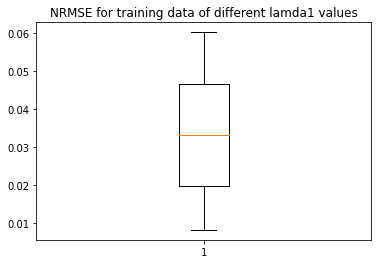

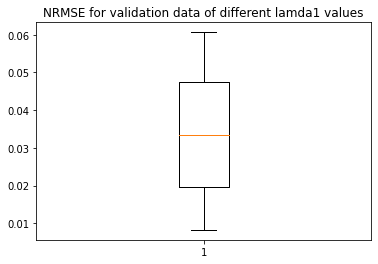

Text(0, 0.5, 'NRMSE')

In [592]:
#now we do the plotting, we plot regular plot as well as boxplot

plt.boxplot([NRMSE_train_list_h])  #passing data array to boxplot
plt.title("NRMSE for training data of different lamda1 values")
plt.show()

plt.boxplot([NRMSE_val_list_h]) #passing data array to boxplot
plt.title("NRMSE for validation data of different lamda1 values")
plt.show()



plt.figure() #
plt.plot(noise_var_list,NRMSE_train_list_h,label='training data',linestyle='--', marker='o') #plot the training nrmse against lamda2 #reference:https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.plot(noise_var_list,NRMSE_val_list_h,label='validation  data',linestyle='--', marker='o') #plot the val nrmse against lamda2 #reference: https://stackoverflow.com/questions/8409095/set-markers-for-individual-points-on-a-line-in-matplotlib
plt.legend(["Training NRMSE", "Validation NRMSE"]) #legend reference:https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
#giving titles to axes and plot 
plt.title("NRMSE vs (lamda1)")
plt.xlabel("(lamda1)")
plt.ylabel("NRMSE")

# **Overall Learnings of the assignment**

Studied 2 of the techniques of Linear regression, that is Pseudo inverse and Gradient descend, out of which the gradient descend, being iterative method, takes more amount of time but on the other hand , Psuedo inverse method is computationally expensive

The target values were generated using gaussian noise which gave the good approximation to the distribution between X and t. As this variance increases,clearly the data starts to become more and more noisy





Large number of features help machines in learning better since the machine gets insights of many different dimensions of data.On a similar trend, the error descreases as number of training samples increase since more number of samples ascertain the final weights

It helps to reduce the error to great extent if we give more iterations to the machine

In gradient descend, it is important to choose right learning rate, since we cant take long time to reach the minimma, and on the other hand, we also cant miss the minimma due to large steo size.

# **REFERENCES:**



1. All internet source links have been put in the comments wherever the relevent part is used
2. Class lecture ppts
3. Discussuion with fellow student Mr. Vishnu R about how to generate the 't' data using gaussian noise 